#### Importando bibliotecas

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix


import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt
import numpy as np
from datetime import datetime


#### Carregando dados

In [2]:
path = os.path.join('VendasTesouroDireto_1.json')
values = pd.read_json(path)
df_data = pd.DataFrame(values)
df_data['Tipo_Titulo'] = df_data['Tipo_Titulo'].astype('str') 
df_data['PU'] = df_data['PU'].str.replace(',', '.')
df_data['Quantidade'] = df_data['Quantidade'].str.replace(',', '.')
df_data['Valor'] = df_data['Valor'].str.replace(',', '.')
df_data['PU'] = pd.to_numeric(df_data['PU'], errors='coerce')
df_data['Quantidade'] = pd.to_numeric(df_data['Quantidade'], errors='coerce')
df_data['Valor'] = pd.to_numeric(df_data['Valor'], errors='coerce')
df_data['Vencimento_do_Titulo'] = pd.to_datetime(df_data['Vencimento_do_Titulo'])
df_data['Data_Venda'] = pd.to_datetime(df_data['Data_Venda'])


df_data

,Tipo_Titulo,Vencimento_do_Titulo,Data_Venda,PU,Quantidade,Valor
0,Tesouro IPCA+ com Juros Semestrais,2012-08-15,2008-05-12,1655.206735,38.6,63890.97
1,Tesouro IPCA+ com Juros Semestrais,2017-05-15,2008-05-12,1480.154343,571.0,845168.12
2,Tesouro Prefixado com Juros Semestrais,2014-01-01,2008-05-12,870.303177,283.2,246469.85
3,Tesouro Prefixado com Juros Semestrais,2012-01-01,2008-05-12,936.285273,29.2,27339.52
4,Tesouro Prefixado com Juros Semestrais,2017-01-01,2008-05-12,808.587250,491.8,397663.20
...,...,...,...,...,...,...
66164,Tesouro Prefixado com Juros Semestrais,2010-01-01,2008-08-27,960.339019,110.2,105829.35
66165,Tesouro IPCA+ com Juros Semestrais,2010-08-15,2008-08-27,1672.613421,271.2,453612.75
66166,Tesouro IPCA+ com Juros Semestrais,2011-05-15,2008-08-27,1677.517573,88.2,147957.04
66167,Tesouro Prefixado com Juros Semestrais,2010-01-07,2008-08-27,946.566666,0.6,567.93


#### Visualizando dados

In [3]:
#plt.scatter(df_data['PU'],df_data['Valor'])

#plt.xlabel('PU')
#plt.ylabel('Valor')

#plt.show()

In [4]:
df_data.columns

Index(['Tipo_Titulo', 'Vencimento_do_Titulo', 'Data_Venda', 'PU', 'Quantidade',
       'Valor'],
      dtype='object')

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66169 entries, 0 to 66168
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Tipo_Titulo           66169 non-null  object        
 1   Vencimento_do_Titulo  66169 non-null  datetime64[ns]
 2   Data_Venda            66169 non-null  datetime64[ns]
 3   PU                    66169 non-null  float64       
 4   Quantidade            66169 non-null  float64       
 5   Valor                 66169 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 3.0+ MB


In [6]:
df_data['Data_Venda'].value_counts()

2008-02-04    28
2008-03-31    28
2008-03-24    28
2008-03-20    28
2008-02-22    28
              ..
2002-04-01     1
2016-02-09     1
2002-03-26     1
2002-06-27     1
2003-08-02     1
Name: Data_Venda, Length: 4842, dtype: int64

In [7]:
df_data['Vencimento_do_Titulo'] = pd.to_datetime(df_data['Vencimento_do_Titulo'], errors='coerce')
df_data['Vencimento_do_Titulo'].groupby(df_data['Vencimento_do_Titulo'].dt.year).count()

Vencimento_do_Titulo
2002     214
2003     289
2004     977
2005    1907
2006    2014
2007    2073
2008    3428
2009    3026
2010    3155
2011    2428
2012    2791
2013    1467
2014    1666
2015    4738
2016     490
2017    4410
2018     484
2019    1257
2020    1900
2021    2401
2022     254
2023    1627
2024    5723
2025    1470
2026    1711
2027     616
2029     481
2030     360
2031    1349
2035    6021
2040     359
2045    2894
2050    1828
2055     361
Name: Vencimento_do_Titulo, dtype: int64

In [8]:
df_data[df_data['Vencimento_do_Titulo'].dt.year == 2002].value_counts()
#df_data.loc[df_data['Vencimento_do_Titulo'].dt.year == 2002]


Tipo_Titulo        Vencimento_do_Titulo  Data_Venda  PU          Quantidade  Valor    
Tesouro Prefixado  2002-02-10            2002-01-07  952.324951  206.0       196178.93    1
                   2002-05-06            2002-01-14  934.752631  7.6         7104.11      1
                                         2002-01-16  935.372115  41.6        38911.47     1
                                         2002-01-17  936.242653  49.0        45875.88     1
                                         2002-01-18  937.777226  119.0       111595.48    1
                                                                                         ..
                   2002-04-12            2002-04-19  896.277336  286.8       257052.33    1
                                         2002-04-22  896.925476  73.4        65834.32     1
                                         2002-04-23  897.182857  56.0        50242.23     1
                                         2002-04-24  896.921527  14.4        12915.66

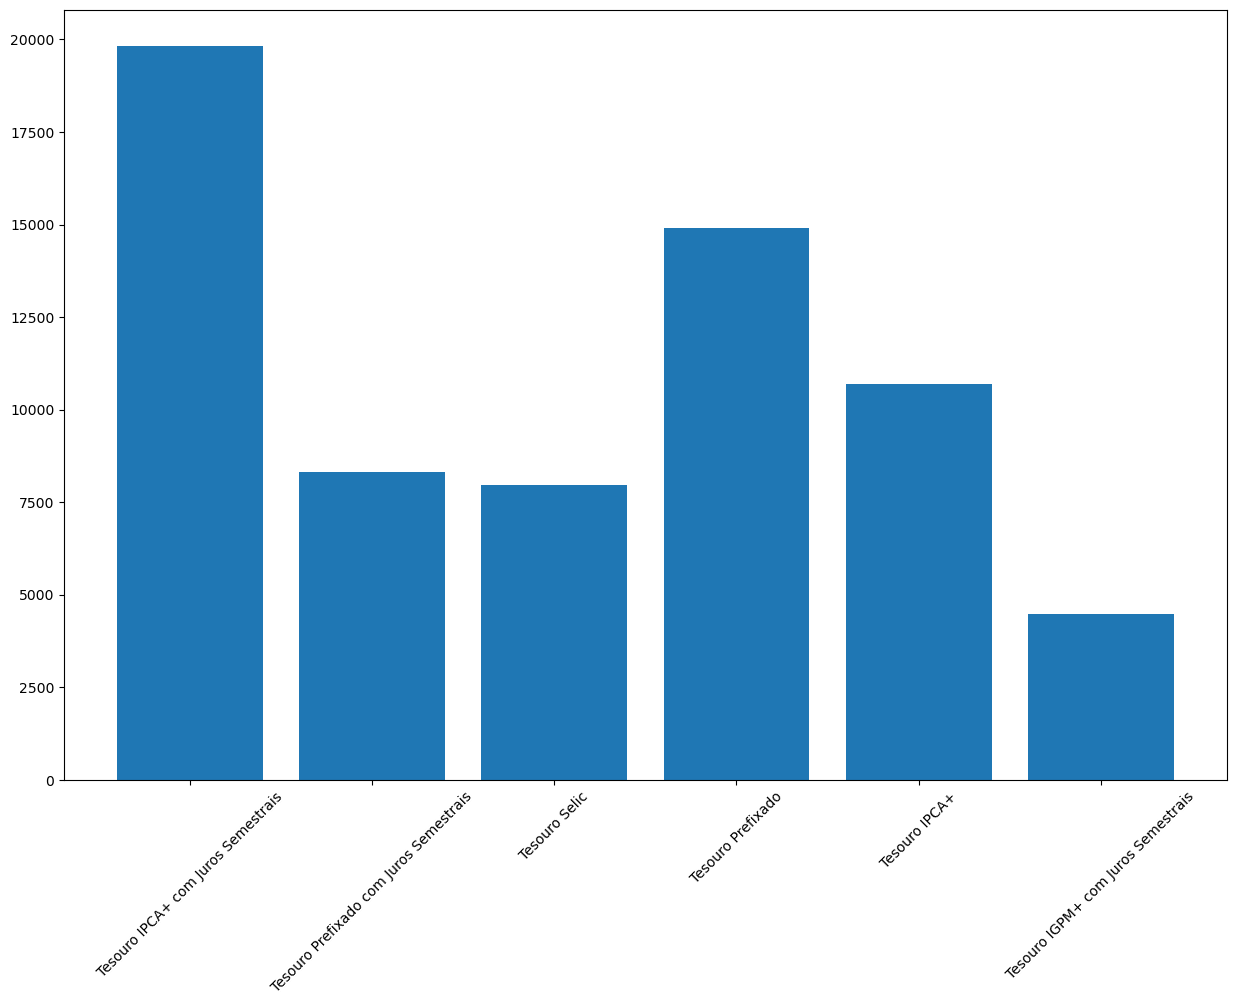

In [9]:
acc = {}
for x in df_data['Tipo_Titulo']:
    if x in acc:
        acc[x] = acc[x] + 1
    else:
        acc[x] = 1
x = acc.keys()
y = acc.values()
fig=plt.figure(figsize=(15,10))
plt.bar(range(len(acc)), list(acc.values()), align='center')
plt.xticks(range(len(acc)), list(acc.keys()))
plt.xticks(rotation=45)
# colocar labels plt.xlabel()
plt.show()

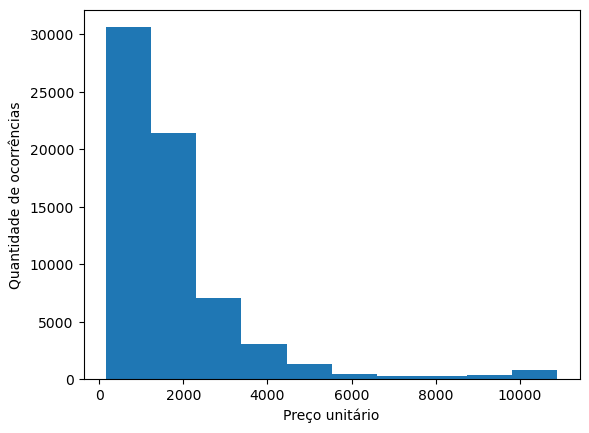

In [10]:
acd = {}
for x in df_data['PU']:
    if x in acd:
        acd[x] = acd[x] + 1
    else:
        acd[x] = 1
        
plt.hist(acd)
plt.xlabel('Preço unitário')
plt.ylabel('Quantidade de ocorrências')
plt.show()

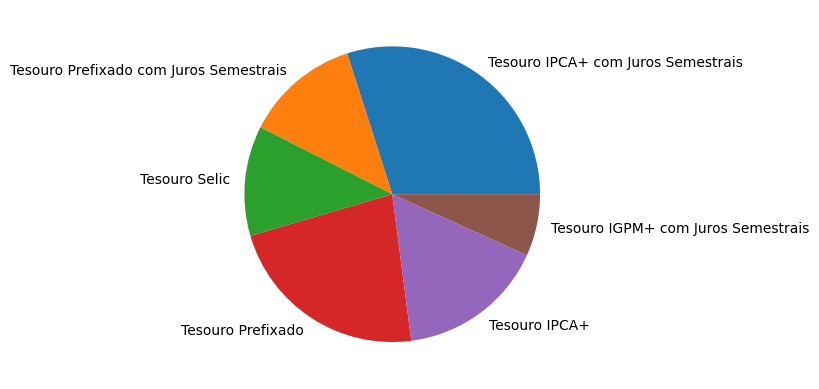

In [11]:
plt.pie([x/len(df_data.value_counts()) for x in acc.values()],labels=acc.keys())
plt.show()

In [12]:

dftwo = df_data['Data_Venda'].value_counts().rename_axis('Data_Venda').reset_index(name='counts')
dftwo['Data_Venda'] = dftwo['Data_Venda'].astype(str)


x=dftwo['Data_Venda']
y=dftwo['counts']
plt.plot(x,y)
plt.plot()

[]

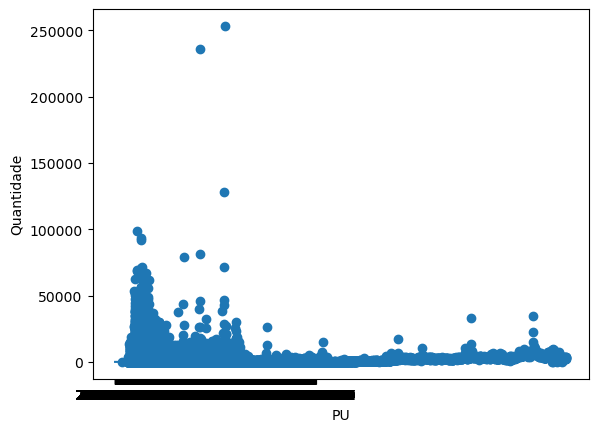

In [13]:
#df_datapu = [x for i, x  in enumerate(df_data['PU']) if i < 1000]
#df_dataqtd = [x for i, x  in enumerate(df_data['Quantidade']) if i < 1000]

#plt.scatter(df_datapu, df_dataqtd)
plt.scatter(df_data['PU'], df_data['Quantidade'])
plt.xlabel('PU')
plt.ylabel('Quantidade')
# pode-se observar que quanto menor o preço unitário, maior é a quantidade vendida
plt.show()

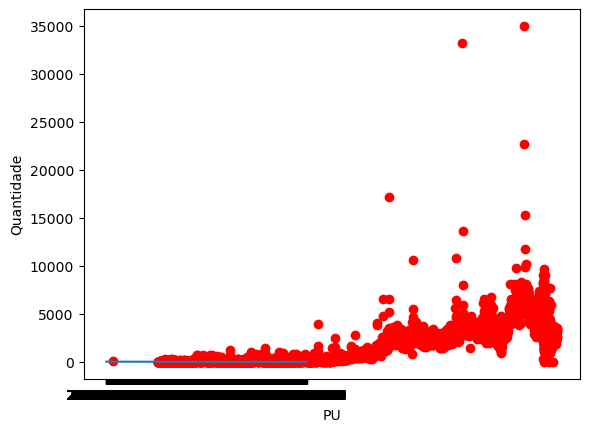

In [13]:
#df_datapu = [x for i, x  in enumerate(df_data['PU']) if i < 1000]
#df_dataqtd = [x for i, x  in enumerate(df_data['Quantidade']) if i < 1000]

#plt.scatter(df_datapu, df_dataqtd)
df_dados_c0=df_data[df_data['Tipo_Titulo']=='Tesouro Prefixado com Juros Semestrais']
df_dados_c1=df_data[df_data['Tipo_Titulo']=='Tesouro Selic']
df_dados_c2=df_data[df_data['Tipo_Titulo']=='Tesouro Prefixado']
df_dados_c3=df_data[df_data['Tipo_Titulo']=='Tesouro Prefixado IPCA+']
df_dados_c4=df_data[df_data['Tipo_Titulo']=='Tesouro IGPM+ com Juros Semestrais']
df_dados_c5=df_data[df_data['Tipo_Titulo']=='Tesouro Prefixado IPCA+ com Juros Semestrais']

#plt.scatter(df_dados_c0['PU'], df_dados_c0['Quantidade'],c='blue')
plt.scatter(df_dados_c1['PU'], df_dados_c1['Quantidade'],c='red')
#plt.scatter(df_dados_c2['PU'], df_dados_c2['Quantidade'],c='green')
#plt.scatter(df_dados_c3['PU'], df_dados_c3['Quantidade'],c='purple')
#plt.scatter(df_dados_c4['PU'], df_dados_c4['Quantidade'],c='yellow')
#plt.scatter(df_dados_c5['PU'], df_dados_c5['Quantidade'],c='red')


plt.xlabel('PU')
plt.ylabel('Quantidade')
# pode-se observar que quanto menor o preço unitário, maior é a quantidade vendida
plt.show()

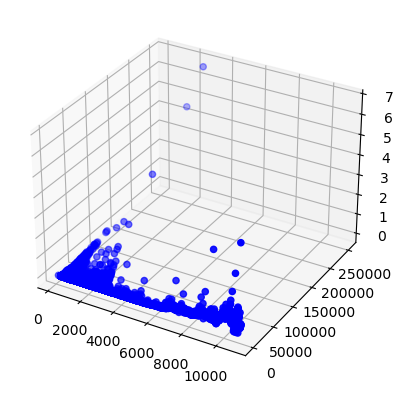

In [15]:

if 'Valor' in df_data.columns:
    ax = plt.axes(projection='3d')
    ax.scatter3D(df_data['PU'].array,df_data['Quantidade'].array,df_data['Valor'].array, color='blue');
    plt.show()

In [16]:
pu = df_data['Quantidade']
# será se deve ser essas colunas mesmo?
df_features = df_data.drop(columns=['Tipo_Titulo', 'Vencimento_do_Titulo', 'Data_Venda', 'Quantidade'])

df_features

,PU,Valor
0,1655.206735,63890.97
1,1480.154343,845168.12
2,870.303177,246469.85
3,936.285273,27339.52
4,808.587250,397663.20
...,...,...
66164,960.339019,105829.35
66165,1672.613421,453612.75
66166,1677.517573,147957.04
66167,946.566666,567.93


In [10]:
#definindo target
Tipo_Titulo=df_data['Tipo_Titulo'].array
#Tirando target e data sem valor numerico
df_features=df_data.drop(columns=['Tipo_Titulo','Data_Venda','Vencimento_do_Titulo'])

#Redimencionando com TSNE
model=TSNE(n_components=2)

array_red=model.fit_transform(df_features)

df_tsne=pd.DataFrame(array_red,columns=['f1','f2'])

#separando data pelo target
df_tsne['Tipo_Titulo']=Tipo_Titulo
#df_tsne_c0=df_tsne[df_tsne['Tipo_Titulo']=='Tesouro Prefixado com Juros Semestrais']
df_tsne_c1=df_tsne[df_tsne['Tipo_Titulo']=='Tesouro Selic']
#df_tsne_c2=df_tsne[df_tsne['Tipo_Titulo']=='Tesouro Prefixado']
#df_tsne_c3=df_tsne[df_tsne['Tipo_Titulo']=='Tesouro Prefixado IPCA+']
#df_tsne_c4=df_tsne[df_tsne['Tipo_Titulo']=='Tesouro IGPM+ com Juros Semestrais']
#df_tsne_c5=df_tsne[df_tsne['Tipo_Titulo']=='Tesouro Prefixado IPCA+ com Juros Semestrais']
#teste
df_tsne_c1

,f1,f2,Tipo_Titulo
6,-30.741697,-17.014744,Tesouro Selic
9,13.753488,-37.934288,Tesouro Selic
27,26.270432,-42.160282,Tesouro Selic
32,16.855577,-4.908050,Tesouro Selic
47,-13.662531,12.595905,Tesouro Selic
...,...,...,...
66128,-31.565666,-22.589422,Tesouro Selic
66138,58.346466,-34.332603,Tesouro Selic
66144,56.377701,-36.148315,Tesouro Selic
66162,-3.470990,56.921173,Tesouro Selic


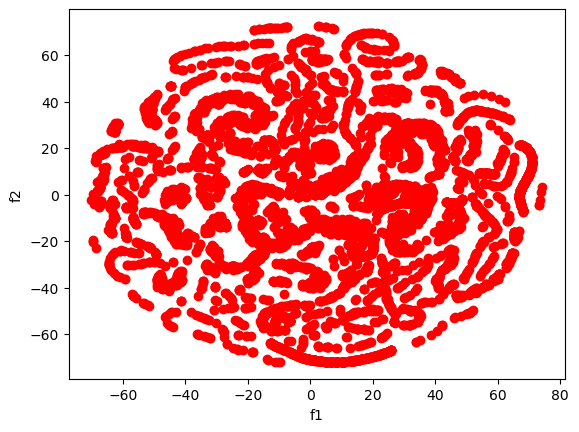

In [18]:
#Fazendo scatte com dado redimencionado

#COMENTEI TUDO MENOS UM PRA VER SE DAVA BOM MAIS CONTINUA SAINDO DATA ILEGIVEL
#plt.scatter(df_tsne_c0['f1'], df_tsne_c0['f2'],c='blue')
plt.scatter(df_tsne_c1['f1'], df_tsne_c1['f2'],c='red')
#plt.scatter(df_tsne_c2['f1'], df_tsne_c2['f2'],c='green')
#plt.scatter(df_tsne_c3['f1'], df_tsne_c3['f2'],c='black')
#plt.scatter(df_tsne_c4['f1'], df_tsne_c4['f2'],c='yellow')
#plt.scatter(df_tsne_c5['f1'], df_tsne_c5['f2'],c='orange')


plt.xlabel('f1')
plt.ylabel('f2')
# pode-se observar que quanto menor o preço unitário, maior é a quantidade vendida
plt.show()



#### Treinando e validando nosso modelo

In [14]:
def getModel():
    #return LinearRegression() # resultados menos efetivos, porém instantaneos e requer pouco processamento
    return RandomForestRegressor() # resultados melhores mas requer muito processamento

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_features.values, pu, test_size=0.2)
# pq está tão baixo?

model = getModel().fit(X_train, y_train)

score = model.score(X_test,y_test)

score

0.9974039912951755

In [13]:
df_features

,PU,Quantidade,Valor
0,1655.206735,38.6,63890.97
1,1480.154343,571.0,845168.12
2,870.303177,283.2,246469.85
3,936.285273,29.2,27339.52
4,808.587250,491.8,397663.20
...,...,...,...
66164,960.339019,110.2,105829.35
66165,1672.613421,271.2,453612.75
66166,1677.517573,88.2,147957.04
66167,946.566666,0.6,567.93


In [18]:
df_features_c1=df_dados_c1.drop(columns=['Tipo_Titulo','Data_Venda','Vencimento_do_Titulo'])
df_features_c1_datas = df_dados_c1.drop(columns=['Tipo_Titulo','Vencimento_do_Titulo'])
df_features_c1

,PU,Quantidade,Valor
6,3694.700000,83.2,307399.04
9,3692.770059,133.6,493354.07
27,3728.658416,140.2,522757.90
32,3726.728894,39.8,148323.80
47,3730.540024,409.0,1525790.86
...,...,...,...
66128,3534.769820,100.4,354890.88
66138,3566.330371,75.4,268901.30
66144,3567.210000,76.0,271107.96
66162,3568.050000,175.4,625835.97


In [19]:
# somando datas para obter datas futuras
future_dates = df_features_c1_datas['Data_Venda']
first = min(df_features_c1_datas['Data_Venda'])
last = max(df_features_c1_datas['Data_Venda'])
diff = last - first
future_dates = future_dates + np.timedelta64(diff)
future_dates

6       2028-04-16
9       2028-04-16
27      2029-01-06
32      2029-01-06
47      2029-04-05
           ...    
66128   2028-07-04
66138   2028-07-31
66144   2028-07-31
66162   2028-08-01
66168   2028-08-01
Name: Data_Venda, Length: 7957, dtype: datetime64[ns]

In [20]:
# exemplo de filtro por intervalo de datas
def filter_interval (data_frame, min_dt, max_dt):
    min_date = np.datetime64(min_dt)
    max_date = np.datetime64(max_dt)
    filtered = [x for x in data_frame if x < max_date and x > min_date]
    return pd.DataFrame({'filtered': filtered})

def removable_indexes (data_frame, min_dt, max_dt):
    min_date = np.datetime64(min_dt)
    max_date = np.datetime64(max_dt)
    return [i for i, x in enumerate(data_frame) if x >= max_date or x <= min_date]

def remove_indexes (data_frame, indexes):
    return [x for i, x in enumerate(data_frame) if i not in indexes]

r = filter_interval(df_features_c1_datas['Data_Venda'], '2008-05-01', '2008-05-30')
r

,filtered
0,2008-05-12
1,2008-05-12
2,2008-05-11
3,2008-05-11
4,2008-05-23
5,2008-05-23
6,2008-05-09
7,2008-05-09
8,2008-05-06
9,2008-05-06


In [21]:
# número de linhas
len(r['filtered'])

36

In [22]:
x1 = len(df_features_c1_datas['Data_Venda'])
x2 = len(df_features_c1['PU'])
if x1 != x2:
    raise Exception(f'{x1} is not equal to {x2}')

In [24]:
#Tentando fazer o training com df_dados_c1(seriam os dados redimencionados para f1 e f2 dos tesouros de tipo Selic)
pu_selic=df_dados_c1['PU']
data_selic=df_dados_c1['Data_Venda']
X_train, X_test, y_train, y_test = train_test_split(df_features_c1.values, pu_selic, test_size=0.2)
model = getModel().fit(X_train, y_train)

score = model.score(X_test,y_test)

score

0.9999997282287899

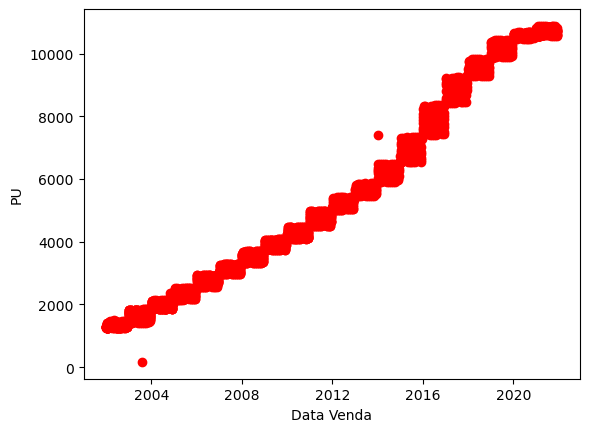

6365

In [61]:
plt.scatter(df_features_c1_datas['Data_Venda'], df_features_c1['PU'],c='red')

plt.ylabel('PU')
plt.xlabel('Data Venda')
plt.show()
len(model.predict(X_train))

In [69]:
plt.scatter(df_features_c1_datas['Data_Venda'],model.predict( df_features_c1['PU']), c='blue')

plt.xlabel('PU')
plt.ylabel('Data Venda')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[3694.7    3692.77   3728.6584 ... 3567.21   3568.05   3568.9302].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### Validando de maneira mais elaborada

In [24]:
scores = cross_val_score(getModel(), df_features.values, pu, cv = 10)
# pq está tão baixo?
print('R2=',np.mean(scores))

R2= 0.9844505841194223


#### Fazendo previsões

In [54]:
# cada array deve ter um número por coluna, como temos duas colunas então fica 0.9,0.9 por item por exemplo
model.predict(X_train)

array([1648.58619858, 4757.00390102, 4129.94121854, ..., 2211.37997562,
       8167.57489286, 3982.76694818])

#### VERIFICANDO CORRELAÇÃO

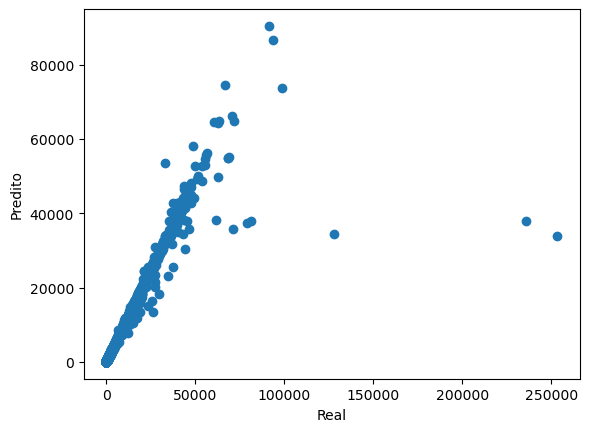

In [25]:
pû = cross_val_predict(getModel(), df_features.values, pu, cv = 20)
plt.scatter(pu, pû)

plt.xlabel('Real')
plt.ylabel('Predito')

plt.show()

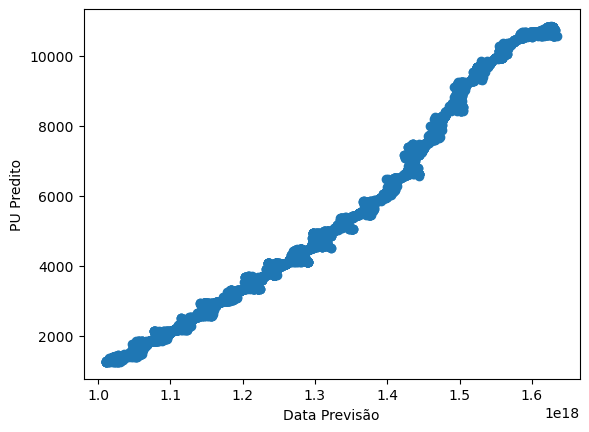

In [26]:
pû_selic = cross_val_predict(getModel(),df_features_c1.values,  pu_selic, cv = 20)
datâ_selic = cross_val_predict(getModel(),df_features_c1.values,  data_selic, cv = 20)
datas = df_dados_c1['Data_Venda']
plt.scatter(datâ_selic, pû_selic)

plt.xlabel('Data Previsão')
plt.ylabel('PU Predito')

plt.show()

In [31]:
pû_selic

array([3687.04755261, 3686.93584881, 3731.05293597, ..., 3565.40640123,
       3566.58461509, 3570.99225505])

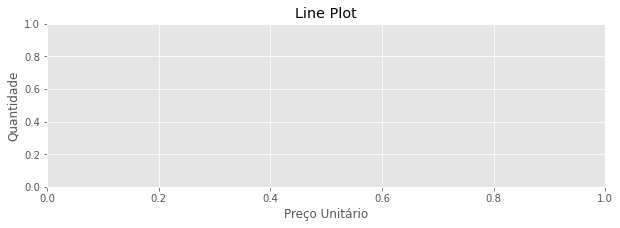

0        False
1        False
2        False
3        False
4        False
         ...  
66164    False
66165    False
66166    False
66167    False
66168     True
Name: Tipo_Titulo, Length: 66169, dtype: bool

In [26]:
fig=plt.figure(figsize=(10,3))
isSelic = df_data['Tipo_Titulo'] == "Tesouro Selic"
#if df_data.isSelic == true:
 #   plt.plot(df_data['PU'][isSelic],df_data['Quantidade'][isSelic])

plt.title('Line Plot')
plt.xlabel('Preço Unitário')
plt.ylabel('Quantidade')
#df_data['PU'][isSelic].value_counts()
plt.show()

isSelic

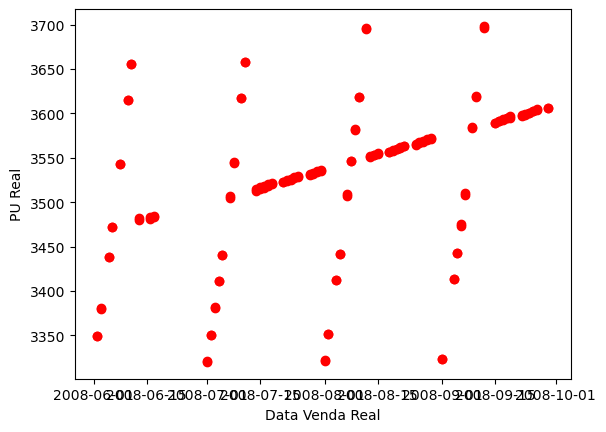

6365

In [29]:
min_date = '2008-06-01'
max_date = '2008-09-30'
filtered_sell_date = filter_interval(df_features_c1_datas['Data_Venda'], min_date, max_date)
pu_invalid_indexes = removable_indexes(df_features_c1_datas['Data_Venda'], min_date, max_date)
filtered_pu = pd.DataFrame({'PU': remove_indexes(df_features_c1['PU'], pu_invalid_indexes)})
#plt.scatter(df_features_c1_datas['Data_Venda'], df_features_c1['PU'],c='red')
plt.scatter(filtered_sell_date, filtered_pu,c='red')

plt.ylabel('PU Real')
plt.xlabel('Data Venda Real')
plt.show()
len(model.predict(X_train))

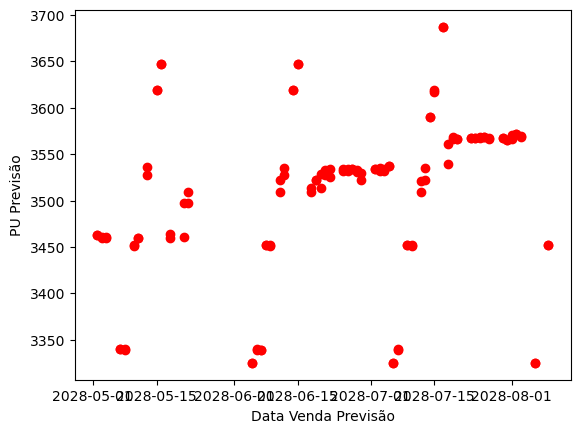

6365

In [30]:
min_date = '2028-05-01'
max_date = '2028-08-10'
filtered_sell_date = filter_interval(future_dates, min_date, max_date)
pu_invalid_indexes = removable_indexes(future_dates, min_date, max_date)
filtered_pu = pd.DataFrame({'PU': remove_indexes(pû_selic, pu_invalid_indexes)})
#plt.scatter(df_features_c1_datas['Data_Venda'], df_features_c1['PU'],c='red')
plt.scatter(filtered_sell_date, filtered_pu,c='red')

plt.ylabel('PU Previsão')
plt.xlabel('Data Venda Previsão')
plt.show()
len(model.predict(X_train))